In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

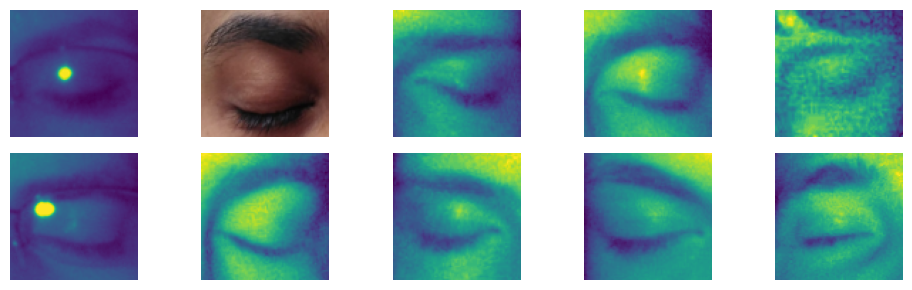

In [60]:
# Define paths to your dataset
dataset_path = 'open-closed-eyes-dataset/train'

eyes_closed_path = dataset_path + '/closed'

# Get the list of image files in the folder
image_files = os.listdir(eyes_closed_path)

# Select 10 random images from the list
random_images = random.sample(image_files, 10)

# Set up a 2x5 grid for displaying images
fig, axes = plt.subplots(2, 5, figsize=(10, 3))

# Loop through the grid and display the random images
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(os.path.join(eyes_closed_path, random_images[i]))
    ax.imshow(img)
    ax.axis('off')  # Turn off axis for better display

plt.tight_layout()
plt.show()

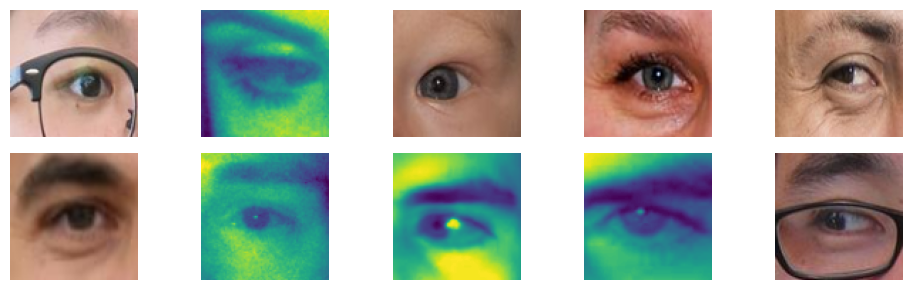

In [63]:
eyes_open_path = dataset_path + '/open'

# Get the list of image files in the folder
image_files = os.listdir(eyes_open_path)

# Select 10 random images from the list
random_images = random.sample(image_files, 10)

# Set up a 2x5 grid for displaying images
fig, axes = plt.subplots(2, 5, figsize=(10, 3))

# Loop through the grid and display the random images
for i, ax in enumerate(axes.flat):
    img = mpimg.imread(os.path.join(eyes_open_path, random_images[i]))
    ax.imshow(img)
    ax.axis('off')  # Turn off axis for better display

plt.tight_layout()
plt.show()

In [61]:
categories = ['closed', 'open']

# Initialize data and labels
data = []
labels = []

# Load and preprocess images
for label, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        
        # Load the image and resize to 90x90
        image = cv2.imread(image_path)
        image = cv2.resize(image, (90, 90))
        
        # Convert the image to grayscale
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Normalize the image to [0, 1]
        image = img_to_array(image) / 255.0
        
        # Append the image and its label
        data.append(image)
        labels.append(label)

# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Expand dimensions of data to fit the CNN input shape
data = np.expand_dims(data, axis=-1)

# One-hot encode the labels
labels = to_categorical(labels, num_classes=len(categories))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print shape of the data
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')


KeyboardInterrupt: 

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Build the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(90, 90, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D output to 1D
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Output layer with 2 units (open, closed) and softmax activation for classification
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 88, 88, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 44, 44, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 42, 42, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,612,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,631,874 (13.85 MB)

 Trainable params: 3,631,874 (13.85 MB)

 Non-trainable params: 0 (0.00 B)

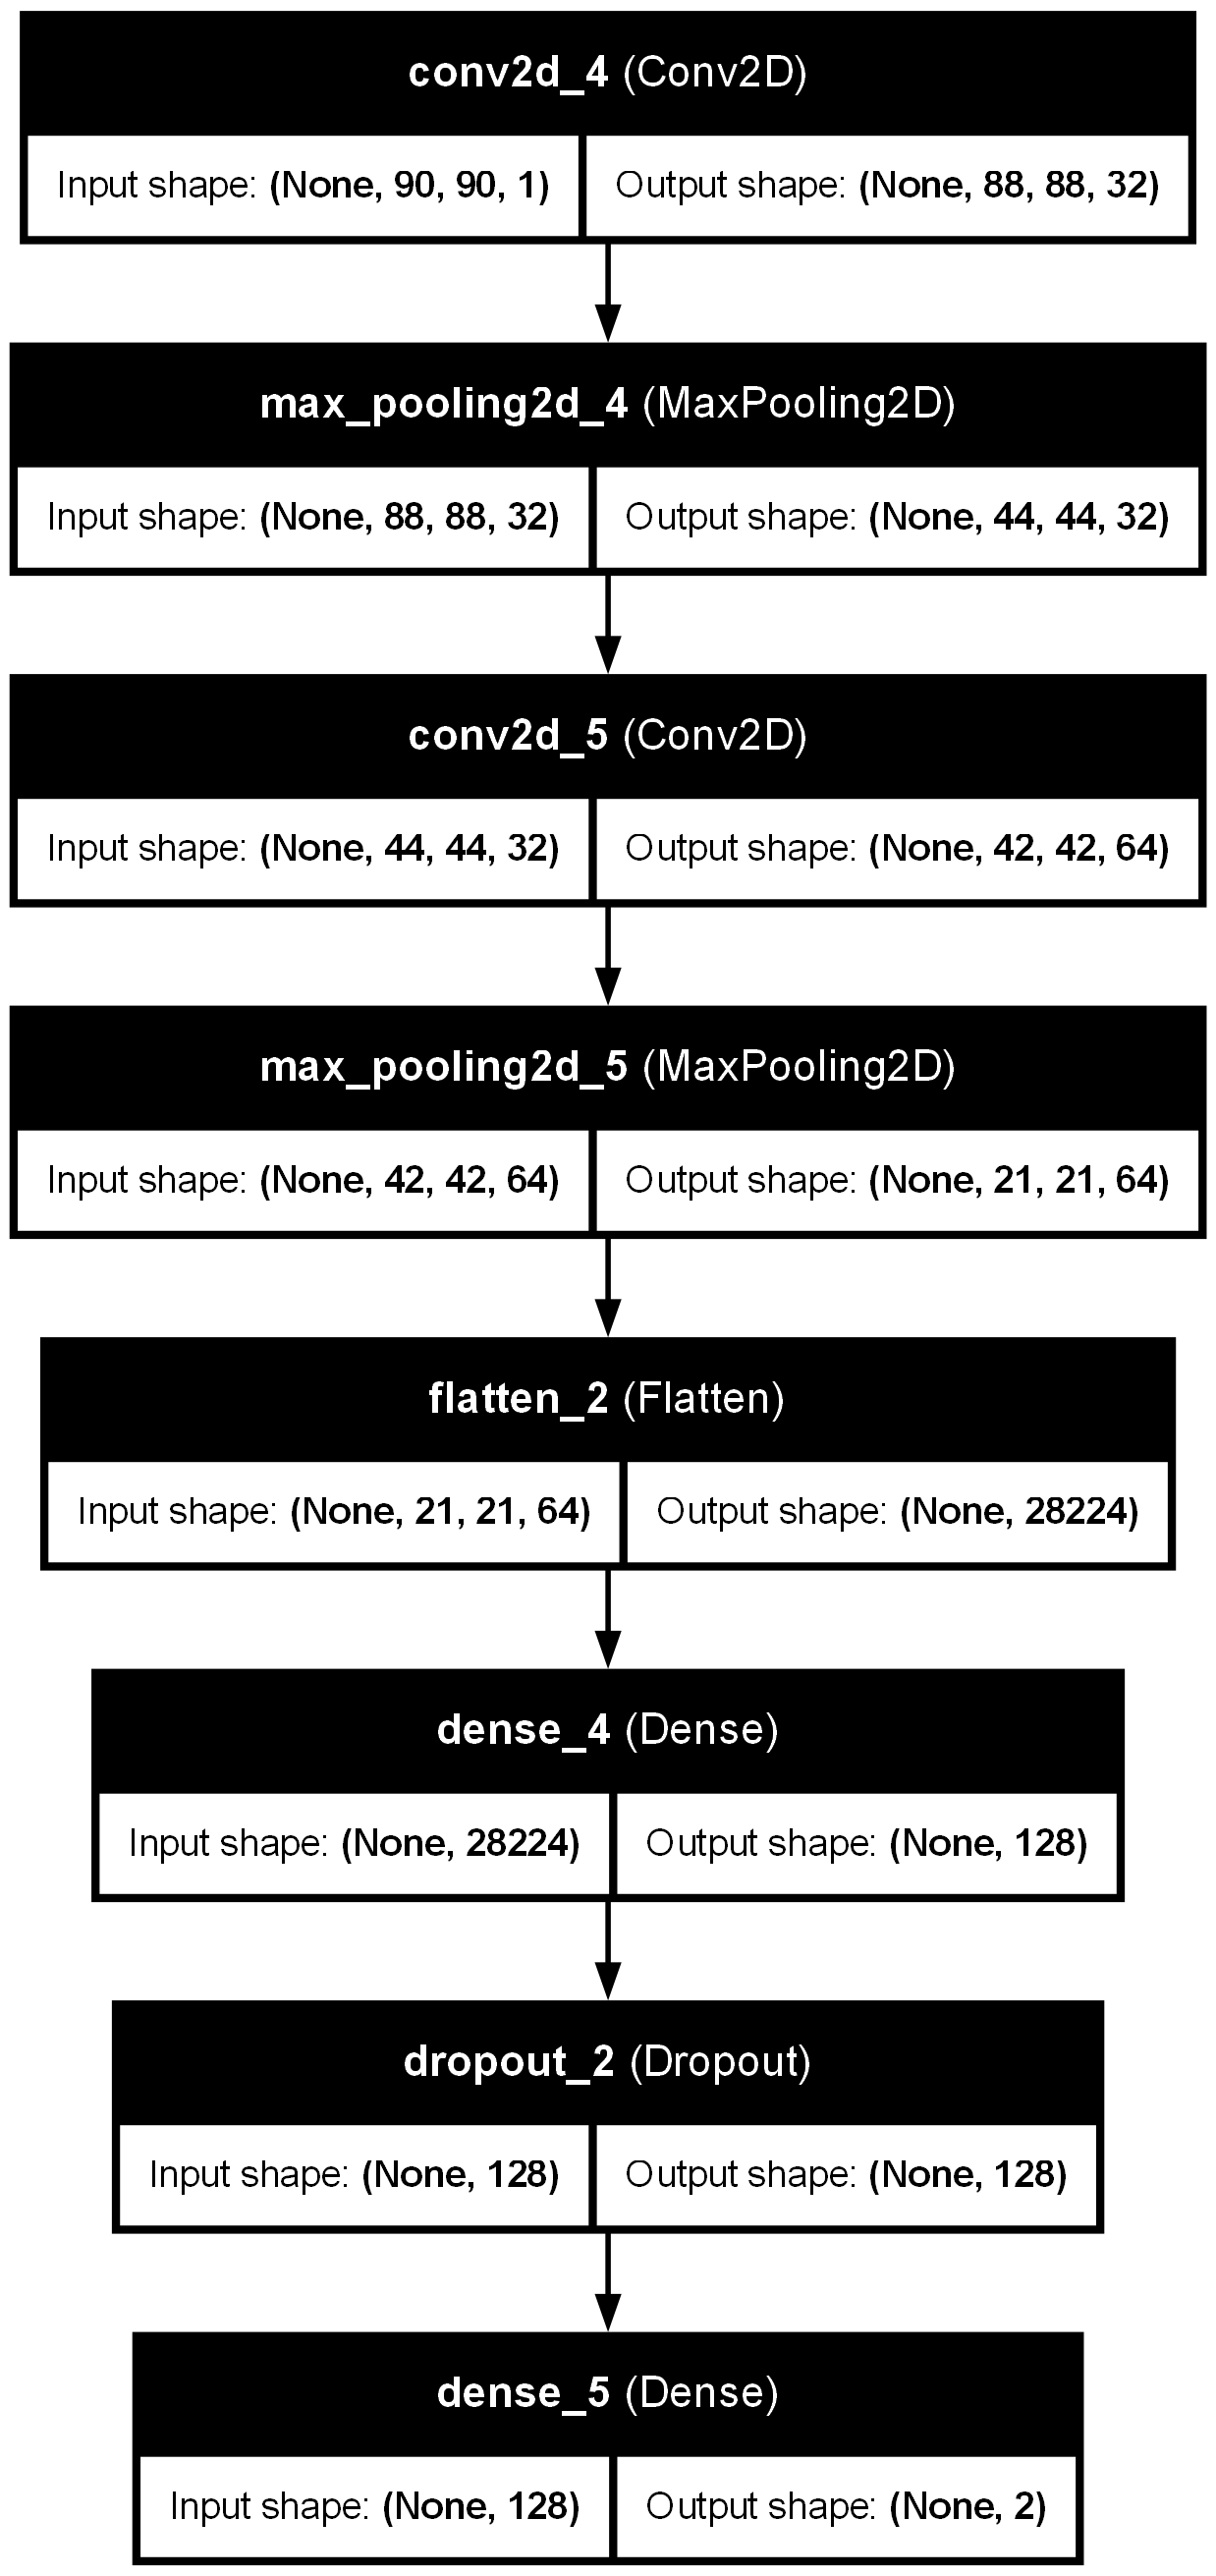

In [9]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='eyes_open_closed_model_architecture.png', show_shapes=True, show_layer_names=True)

In [3]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
82/82 [==============================] - 6s 11ms/step - loss: 0.3784 - accuracy: 0.8242 - val_loss: 0.1880 - val_accuracy: 0.9338
Epoch 2/10
82/82 [==============================] - 1s 7ms/step - loss: 0.1689 - accuracy: 0.9388 - val_loss: 0.1273 - val_accuracy: 0.9631
Epoch 3/10
82/82 [==============================] - 1s 7ms/step - loss: 0.1525 - accuracy: 0.9454 - val_loss: 0.1283 - val_accuracy: 0.9600
Epoch 4/10
82/82 [==============================] - 1s 7ms/step - loss: 0.1354 - accuracy: 0.9508 - val_loss: 0.1230 - val_accuracy: 0.9615
Epoch 5/10
82/82 [==============================] - 1s 7ms/step - loss: 0.1121 - accuracy: 0.9596 - val_loss: 0.1232 - val_accuracy: 0.9615
Epoch 6/10
82/82 [==============================] - 1s 7ms/step - loss: 0.0941 - accuracy: 0.9654 - val_loss: 0.1262 - val_accuracy: 0.9569
Epoch 7/10
82/82 [==============================] - 1s 7ms/step - loss: 0.0847 - accuracy: 0.9662 - val_loss: 0.1215 - val_accuracy: 0.9708
Epoch 8/10
82/82 [=

In [4]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')


21/21 [==============================] - 0s 5ms/step - loss: 0.1347 - accuracy: 0.9631
Test accuracy: 96.31%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


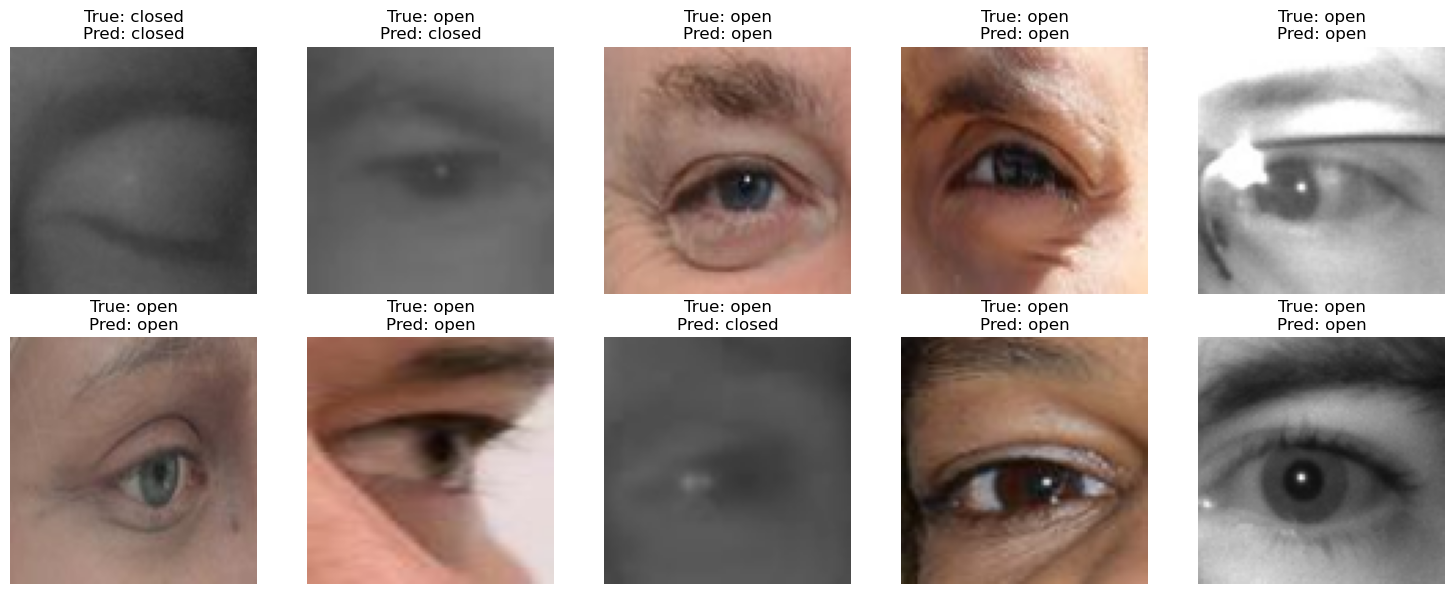

In [41]:
from tensorflow.keras.preprocessing import image

# Path to the folder containing subfolders 'open' and 'closed'
folder_path = 'open-closed-eyes-dataset/test'

# Get the list of image files from both 'open' and 'closed' subfolders
open_folder = os.path.join(folder_path, 'open')
closed_folder = os.path.join(folder_path, 'closed')

# Get a list of image files from both folders
open_images = os.listdir(open_folder)
closed_images = os.listdir(closed_folder)

# Combine images from both folders and shuffle them
all_images = [(os.path.join(open_folder, img), 'open') for img in open_images] + \
             [(os.path.join(closed_folder, img), 'closed') for img in closed_images]
random.shuffle(all_images)

# Select 10 random images
random_images = all_images[:10]

# Set up a 2x5 grid for displaying images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Loop through the random images and make predictions
for i, ax in enumerate(axes.flat):
    img_path, true_label = random_images[i]
    
    # Preprocessing the image using OpenCV
    image = cv2.imread(img_path)
    image = cv2.resize(image, (90, 90))  # Resize to 90x90
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    image = img_to_array(image) / 255.0  # Normalize the image
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Make the prediction (softmax output: two units)
    prediction = model.predict(image)
    
    # Get the predicted label based on the highest probability
    predicted_label = 'open' if np.argmax(prediction) == 1 else 'closed'

    # Load and display the original image in the plot
    original_image = cv2.imread(img_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
    ax.imshow(original_image)
    ax.axis('off')
    
    # Show true and predicted labels as text
    ax.set_title(f'True: {true_label}\nPred: {predicted_label}')

plt.tight_layout()
plt.show()

In [ ]:
# Save the model
model.save('eyes_open_closed_model.h5')
